In [1]:
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [2]:
#Loading the Dataset
iris_data = pd.read_csv('IRIS.csv')

In [3]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.shape

(150, 5)

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
#Dataset Preparation
X = iris_data.loc[:, iris_data.columns != 'species']
y = iris_data.loc[:, ['species']]

In [9]:
y_en = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_en)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#Dataset will be prepared by the tensorflow from_tensor_slice() method.

X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [12]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")

Train shape : (105, 4), Y Train : (105, 3)


In [28]:
#Setting Up the Model with Sigmoid Function
Model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='sigmoid')
    ])

In [29]:
#Checking the Model Summary 
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              5000      
                                                                 
 dense_9 (Dense)             (None, 500)               500500    
                                                                 
 dense_10 (Dense)            (None, 300)               150300    
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 903       
                                                                 
Total params: 656703 (2.51 MB)
Trainable params: 656703 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Compile the model
Model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [65]:
#Model Training 
history = Model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=1)

Epoch 1/60
4/4 [==============================] - 0s 67ms/step - loss: 0.0356 - accuracy: 0.9905 - val_loss: 0.0552 - val_accuracy: 0.9556
Epoch 2/60
4/4 [==============================] - 0s 29ms/step - loss: 0.0346 - accuracy: 0.9905 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 3/60
4/4 [==============================] - 0s 29ms/step - loss: 0.0469 - accuracy: 0.9810 - val_loss: 0.0729 - val_accuracy: 0.9556
Epoch 4/60
4/4 [==============================] - 0s 29ms/step - loss: 0.0423 - accuracy: 0.9905 - val_loss: 0.0889 - val_accuracy: 0.9556
Epoch 5/60
4/4 [==============================] - 0s 32ms/step - loss: 0.0421 - accuracy: 0.9905 - val_loss: 0.0585 - val_accuracy: 0.9556
Epoch 6/60
4/4 [==============================] - 0s 29ms/step - loss: 0.0369 - accuracy: 0.9905 - val_loss: 0.0492 - val_accuracy: 0.9556
Epoch 7/60
4/4 [==============================] - 0s 29ms/step - loss: 0.0354 - accuracy: 0.9905 - val_loss: 0.1026 - val_accuracy: 0.9556
Epoch 8/60
4/4 [===========

In [66]:
#Checking the Training Accuracy
Model.evaluate(X_train,y_train)

4/4 [==============================] - 0s 7ms/step - loss: 0.0327 - accuracy: 0.9905


[0.03269524872303009, 0.9904761910438538]

In [67]:
#Checking the Testing accuracy
Model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0414 - accuracy: 0.9556


[0.04138689488172531, 0.9555555582046509]

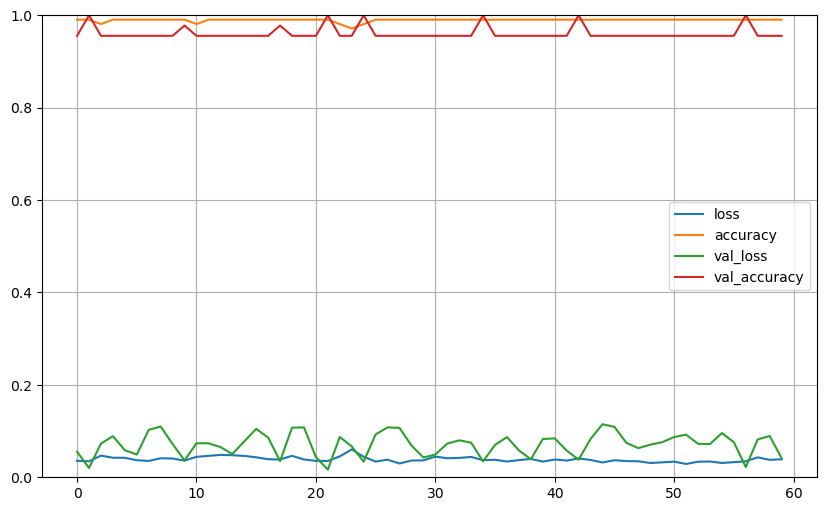

In [68]:
#Performance Monitor
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
#Setting the Model with tanh function
Model2 = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='tanh')
    ])

In [36]:
Model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1000)              5000      
                                                                 
 dense_13 (Dense)            (None, 500)               500500    
                                                                 
 dense_14 (Dense)            (None, 300)               150300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_15 (Dense)            (None, 3)                 903       
                                                                 
Total params: 656703 (2.51 MB)
Trainable params: 656703 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Compile the model
Model2.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [52]:
#Model Training 
history = Model2.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=1)

Epoch 1/60
4/4 [==============================] - 2s 51ms/step - loss: 1.8553 - accuracy: 0.2857 - val_loss: 1.0292 - val_accuracy: 0.4444
Epoch 2/60
4/4 [==============================] - 0s 27ms/step - loss: 1.0621 - accuracy: 0.2857 - val_loss: 0.9999 - val_accuracy: 0.4444
Epoch 3/60
4/4 [==============================] - 0s 24ms/step - loss: 0.9950 - accuracy: 0.2857 - val_loss: 0.7447 - val_accuracy: 0.4444
Epoch 4/60
4/4 [==============================] - 0s 24ms/step - loss: 1.0560 - accuracy: 0.2857 - val_loss: 0.6731 - val_accuracy: 0.4444
Epoch 5/60
4/4 [==============================] - 0s 24ms/step - loss: 0.7836 - accuracy: 0.2857 - val_loss: 0.5816 - val_accuracy: 0.4444
Epoch 6/60
4/4 [==============================] - 0s 27ms/step - loss: 1.5297 - accuracy: 0.2857 - val_loss: 0.8013 - val_accuracy: 0.4444
Epoch 7/60
4/4 [==============================] - 0s 27ms/step - loss: 1.0084 - accuracy: 0.4190 - val_loss: 1.0467 - val_accuracy: 0.6889
Epoch 8/60
4/4 [===========

In [63]:
#Checking the Training Accuracy
Model2.evaluate(X_train,y_train)

4/4 [==============================] - 0s 5ms/step - loss: 0.6140 - accuracy: 0.3714


[0.6140228509902954, 0.37142857909202576]

In [64]:
#Checking the Testing accuracy
Model2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.7164 - accuracy: 0.2444


[0.7163598537445068, 0.24444444477558136]

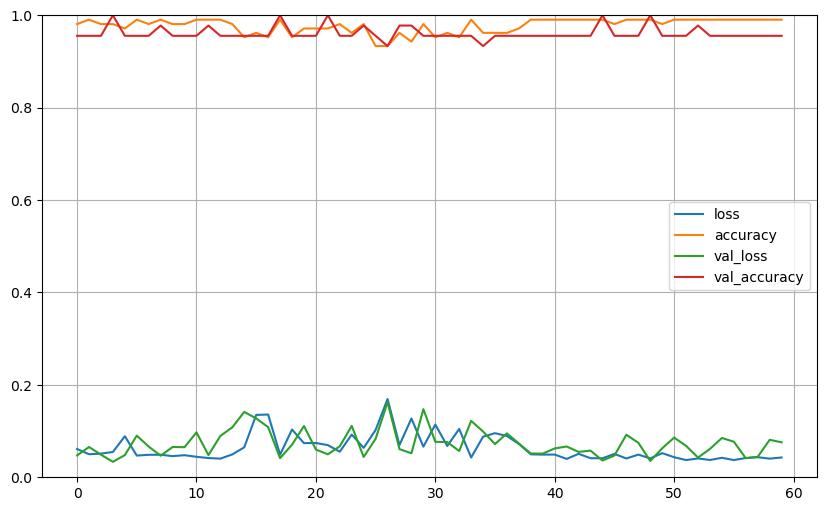

In [61]:
#Performance Monitor
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [73]:
#Setting the Model with tanh function
Model3 = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])

In [74]:
Model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1000)              5000      
                                                                 
 dense_21 (Dense)            (None, 500)               500500    
                                                                 
 dense_22 (Dense)            (None, 300)               150300    
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_23 (Dense)            (None, 3)                 903       
                                                                 
Total params: 656703 (2.51 MB)
Trainable params: 656703 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
# Compile the model
Model3.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [76]:
#Model Training 
history = Model3.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=1)

Epoch 1/60
4/4 [==============================] - 2s 134ms/step - loss: 1.0008 - accuracy: 0.4571 - val_loss: 0.7293 - val_accuracy: 0.7556
Epoch 2/60
4/4 [==============================] - 0s 24ms/step - loss: 0.7455 - accuracy: 0.6857 - val_loss: 0.4598 - val_accuracy: 0.8000
Epoch 3/60
4/4 [==============================] - 0s 21ms/step - loss: 0.5094 - accuracy: 0.7714 - val_loss: 0.3431 - val_accuracy: 0.8667
Epoch 4/60
4/4 [==============================] - 0s 24ms/step - loss: 0.3922 - accuracy: 0.7905 - val_loss: 0.2832 - val_accuracy: 0.8667
Epoch 5/60
4/4 [==============================] - 0s 21ms/step - loss: 0.3427 - accuracy: 0.8857 - val_loss: 0.3316 - val_accuracy: 0.7778
Epoch 6/60
4/4 [==============================] - 0s 24ms/step - loss: 0.3220 - accuracy: 0.8381 - val_loss: 0.2208 - val_accuracy: 0.8667
Epoch 7/60
4/4 [==============================] - 0s 24ms/step - loss: 0.2125 - accuracy: 0.9143 - val_loss: 0.1557 - val_accuracy: 0.9556
Epoch 8/60
4/4 [==========

In [77]:
Model3.evaluate(X_train,y_train)

4/4 [==============================] - 0s 5ms/step - loss: 0.0675 - accuracy: 0.9810


[0.06754735857248306, 0.9809523820877075]

In [78]:
Model3.evaluate(X_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0474 - accuracy: 1.0000


[0.04739754647016525, 1.0]

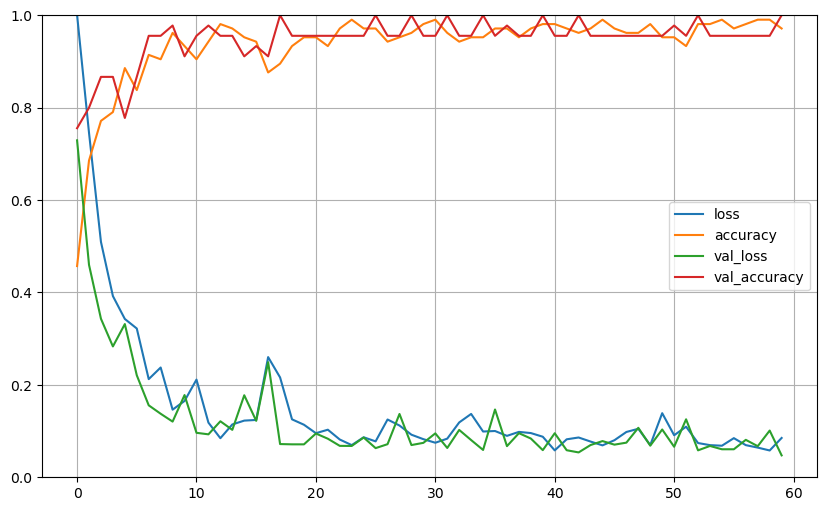

In [79]:
#Performance Monitor
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [69]:
#The Model with Softmax Function(Model3) & Sigmoid Function(Model) provides the best accuracies. So anyone could be selected 

In [70]:
#Predicting the Output with Model

new_data, y_actual = X_test[:3], y_test[:3]
y_proba = Model.predict(new_data)
print(f"Actual data : {y_actual}")

for pred in y_proba:
    print(np.argmax(pred))

1/1 [==============================] - 0s 184ms/step
Actual data : [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
0
0
0


In [71]:
#Predicting the Output with Model2

new_data, y_actual = X_test[:3], y_test[:3]
y_proba = Model2.predict(new_data)
print(f"Actual data : {y_actual}")

for pred in y_proba:
    print(np.argmax(pred))

1/1 [==============================] - 0s 136ms/step
Actual data : [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
2
2
2


In [80]:
#Predicting the Output with Model3

new_data, y_actual = X_test[:3], y_test[:3]
y_proba = Model3.predict(new_data)
print(f"Actual data : {y_actual}")

for pred in y_proba:
    print(np.argmax(pred))

1/1 [==============================] - 0s 79ms/step
Actual data : [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
0
0
0
